In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data_in/total_df.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_13052\665302458.py:1: DtypeWarning: Columns (17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data_in/total_df.csv')


In [3]:
column_filter = ['Order_id', 'Product_id', 'Seller_id', 'Price',
       'Freight_value', 'Customer_id',
       'Product_category_name', 'Revenue',
       'Customer_city',
       'Order_purchase_timestamp',
       'Payment_sequential', 'Payment_type','Payment_installments', 'Payment_value',
       'Review_score']

df = df[column_filter]

### 도시별 리뷰 점수 확인

In [4]:
df['Review_score'].isna().sum()

810

In [5]:
city_review = df.pivot_table(
    index= 'Customer_city',
    values= 'Review_score',
    aggfunc= 'mean'
).dropna().sort_values(by= 'Review_score', ascending= False)

In [6]:
freq = pd.DataFrame(df['Customer_city'].value_counts())

In [7]:
city_review_total = pd.merge(city_review, freq, how= 'left', on= 'Customer_city')

In [8]:
city_review_total.sort_values(by= 'count', ascending= False).head(20)

,Review_score,count
Customer_city,,
sao paulo,4.163473,16453
rio de janeiro,3.891012,7307
belo horizonte,4.069236,2950
brasilia,4.045872,2198
curitiba,4.108522,1637
campinas,4.040541,1565
porto alegre,3.942719,1455
salvador,3.727003,1367
guarulhos,4.169811,1233


### 매출 구간별 리뷰 점수 확인

In [9]:
df['Revenue'].sort_values(ascending= False).head(15)

28224     14998.5
1525      13440.0
1527      13440.0
1520      13440.0
1521      13440.0
1522      13440.0
1523      13440.0
1524      13440.0
1526      13440.0
47883      7160.0
47881      7160.0
47882      7160.0
47880      7160.0
3309       6735.0
101266     6499.0
Name: Revenue, dtype: float64

In [10]:
# 매출을 구간별로 나누기

bins = np.linspace(df['Revenue'].min(),\
                   df['Revenue'].max(), 1000)
df['Revenue_bin'] = pd.cut(df['Revenue'], bins)

df['Revenue_bin']

0           (45.888, 60.901]
1          (226.04, 241.053]
2         (196.015, 211.027]
3         (196.015, 211.027]
4           (15.863, 30.875]
                 ...        
105761    (286.091, 301.103]
105762    (346.141, 361.154]
105763     (90.926, 105.939]
105764      (45.888, 60.901]
105765      (30.875, 45.888]
Name: Revenue_bin, Length: 105766, dtype: category
Categories (999, interval[float64, right]): [(0.85, 15.863] < (15.863, 30.875] < (30.875, 45.888] < (45.888, 60.901] ... (14938.449, 14953.462] < (14953.462, 14968.475] < (14968.475, 14983.487] < (14983.487, 14998.5]]

In [11]:
df.pivot_table(
    index= 'Revenue_bin',
    values= 'Review_score',
    aggfunc= 'count'
).head(31)

C:\Users\USER\AppData\Local\Temp\ipykernel_13052\3423289876.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


,Review_score
Revenue_bin,
"(0.85, 15.863]",2958
"(15.863, 30.875]",11621
"(30.875, 45.888]",9555
"(45.888, 60.901]",13140
"(60.901, 75.913]",7051
"(75.913, 90.926]",8749
"(90.926, 105.939]",6929
"(105.939, 120.951]",7158
"(120.951, 135.964]",3944


### 월, 일별 매출 데이터

In [12]:
from datetime import datetime
import seaborn as sns

In [13]:
type(df['Order_purchase_timestamp'][0])

str

In [14]:
df['YearMonth'] = df['Order_purchase_timestamp'].map(
    lambda x: pd.to_datetime(x).strftime('%Y%m%d')
)

In [15]:
df['YearMonth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 105766 entries, 0 to 105765
Series name: YearMonth
Non-Null Count   Dtype 
--------------   ----- 
105766 non-null  object
dtypes: object(1)
memory usage: 826.4+ KB


In [16]:
_201810 = df['YearMonth'].str.startswith('201810')
_201811 = df['YearMonth'].str.startswith('201811')
_201812 = df['YearMonth'].str.startswith('201812')

In [17]:
df_target_2018 = df[_201810|_201811|_201812]

In [18]:
df_target_2018_1 = df[_201811]

In [19]:
df[_201811].pivot_table(
    index= 'YearMonth',
    values= 'Revenue',
    aggfunc= 'sum'
).sort_values(by= 'Revenue')

,Revenue
YearMonth,
20181105,19795.98
20181119,23751.58
20181110,24465.86
20181107,25582.17
20181111,25881.53
20181112,26828.72
20181108,26836.18
20181102,27394.11
20181101,27677.39


In [20]:
# 그래프 한글

# import font

In [21]:
daily_revenue = df_target_2018_1.groupby('YearMonth')['Revenue'].sum().reset_index()


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) miss

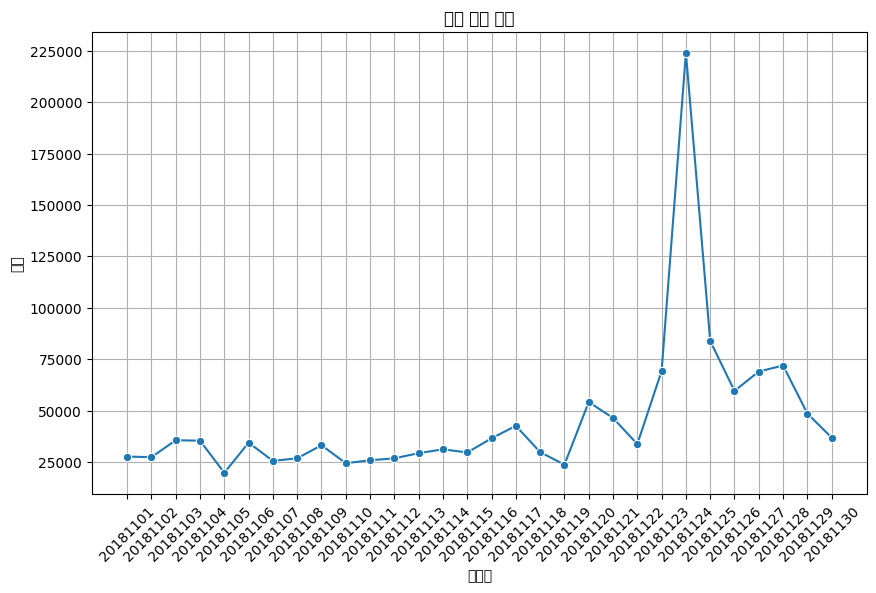

In [22]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Revenue', data=daily_revenue, marker='o')
plt.title('일별 매출 추이')
plt.xlabel('년월일')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
_201905 = df['YearMonth'].str.startswith('201905')
_201906 = df['YearMonth'].str.startswith('201906')
_201907 = df['YearMonth'].str.startswith('201907')

In [24]:
df_target_2019 = df[_201905|_201906|_201907]

In [25]:
daily_revenue = df_target_2019.groupby('YearMonth')['Revenue'].sum().reset_index()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) miss

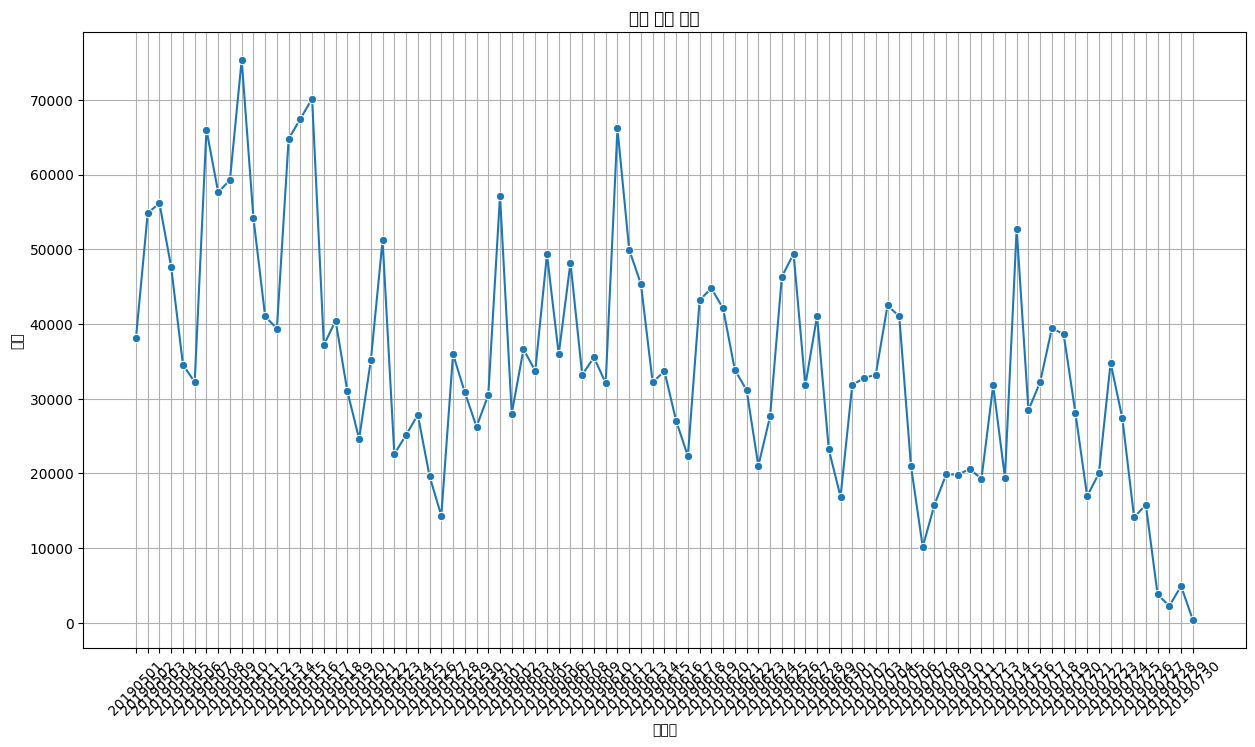

In [26]:

plt.figure(figsize=(15, 8))
sns.lineplot(x='YearMonth', y='Revenue', data=daily_revenue, marker='o')
plt.title('일별 매출 추이')
plt.xlabel('년월일')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
df['Customer_id']

0         CUSTOMER_58023
1         CUSTOMER_30341
2         CUSTOMER_30949
3         CUSTOMER_06713
4         CUSTOMER_20396
               ...      
105761    CUSTOMER_78196
105762    CUSTOMER_23659
105763    CUSTOMER_01326
105764    CUSTOMER_50155
105765    CUSTOMER_03410
Name: Customer_id, Length: 105766, dtype: object

In [28]:
df['Customer_id'].describe()

count             105766
unique             87954
top       CUSTOMER_16592
freq                  63
Name: Customer_id, dtype: object